<a href="https://colab.research.google.com/github/juju-heo/dataStructure/blob/dataStructureBranch/Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
#필요 모듈들
import torch
from torch import nn
from torch.utils.data import TensorDataset, DataLoader, random_split
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#hyperparameters
EPOCHS = 2000 #횟수
LEARNING_RATE = 0.001 #학습률
TEST_SIZE = 0.3
DROPOUT = 0.2
BATCH_SIZE = 2 # 데이터 두 개당 한 묶음으로 읽어들임(메모리 제한 때문에 사용)

data_list = [[1, 2], [10, 20]]

data_tensor = torch.Tensor(data_list)
print(data_tensor)

data_nparray = np.array([[1, 3, 5], [2, 4, 6], [3, 6, 9]])
print(data_nparray)
data_tensor2 = torch.Tensor(data_nparray)
print(data_tensor2)

data = data_tensor2.numpy()
print(data)

TEST_SIZE = 0.3
BATCH_SIZE = 2

df = pd.read_csv("data.csv", encoding="utf-8") #csv파일을 pandas로 읽어와서 저장
scores = torch.Tensor(df.iloc[:,1:-1].values) #data와label로 나누자
labels = torch.Tensor(df.iloc[:,-1].values)

#onehot
classes = ["m", "f", "u"]
num_class = len(classes) #3
class_to_index = {c: idx for idx, c in enumerate(classes)}
genders = df.iloc[:,0].values
gender_onehot = torch.eye(num_class)[[class_to_index[c] for c in genders]]
print(genders)
print(gender_onehot)

inputs = torch.cat([gender_onehot, scores], dim=1)

dataset = TensorDataset(inputs, labels)
train_size = int(len(dataset) * (1-TEST_SIZE))
test_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])
train_dataloader = DataLoader(dataset = train_dataset, batch_size=BATCH_SIZE, shuffle = True)
test_dataloader = DataLoader(dataset = test_dataset, batch_size=BATCH_SIZE, shuffle = True)

print(scores)
print(labels)

tensor([[ 1.,  2.],
        [10., 20.]])
[[1 3 5]
 [2 4 6]
 [3 6 9]]
tensor([[1., 3., 5.],
        [2., 4., 6.],
        [3., 6., 9.]])
[[1. 3. 5.]
 [2. 4. 6.]
 [3. 6. 9.]]
['m' 'm' 'f' 'u' 'f' 'u' 'm' 'f' 'f' 'm' 'f']
tensor([[1., 0., 0.],
        [1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.],
        [0., 1., 0.],
        [0., 0., 1.],
        [1., 0., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [1., 0., 0.],
        [0., 1., 0.]])
tensor([[3., 4., 5.],
        [5., 3., 1.],
        [4., 5., 1.],
        [1., 1., 5.],
        [2., 2., 4.],
        [5., 4., 2.],
        [4., 4., 2.],
        [1., 1., 1.],
        [3., 2., 1.],
        [2., 3., 1.],
        [2., 2., 2.]])
tensor([60., 85., 79., 70., 75., 80., 81., 95., 91., 88., 86.])


In [38]:
class FirstBrain(nn.Module):
  def __init__(self): #뇌의 형태 만들자
    super().__init__()
    #뇌의 모양을 결정하는 코드(뇌 만들기)
    self.hidden_1 = nn.Linear(6, 4)
    self.hidden_2 = nn.Linear(4, 4)
    self.hidden_3 = nn.Linear(4, 4)
    self.hidden_4 = nn.Linear(4, 1)

  def forward(self, x): #입력 값을 받아서 첫번째, 두 번째 hidden layer 지나가기(신경 연결)
    x = self.hidden_1(x)
    x = self.hidden_2(x)
    x = self.hidden_3(x)
    x = self.hidden_4(x)
    return x

model = FirstBrain()

In [39]:
loss_function = nn.MSELoss() #대표적인 손실함수 쓰겠다
optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE) #채점은 Adam optimizer쓰겠다

#train
losses = []
for epoch in range(EPOCHS+1): #epoch은 학습 판수?
  model.train()
  for batch_x, batch_y in train_dataloader:
    prediction = model(batch_x)
    loss = loss_function(prediction, batch_y.unsqueeze(1))
    losses.append(loss)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

test_data = torch.Tensor([[1, 0, 0, 3, 4, 5], [0, 1, 0, 3, 3, 1]])
print(model(test_data))

tensor([[60.2486],
        [87.2153]], grad_fn=<AddmmBackward0>)


In [30]:
import os
MODEL_PATH = "/content/pytorch"

torch.save(model, os.path.join(MODEL_PATH, "model.pt"))
newmodel = torch.load(os.path.join(MODEL_PATH, "model.pt"), weights_only=False)

print(newmodel(test_data))


tensor([[0.5610],
        [0.5358]], grad_fn=<AddmmBackward0>)


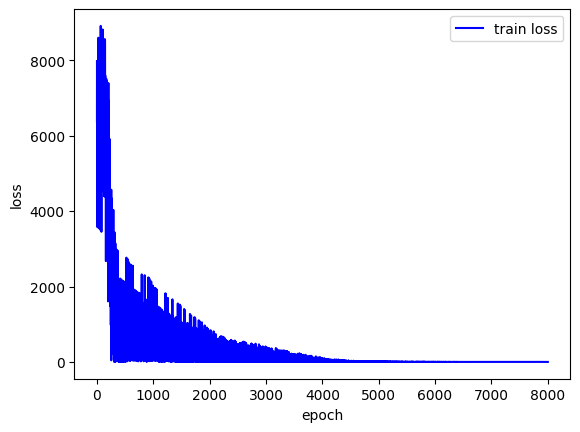

/usr/local/lib/python3.11/dist-packages/torch/nn/modules/loss.py:610: UserWarning: Using a target size (torch.Size([2])) that is different to the input size (torch.Size([2, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


In [40]:
#plot
plt.xlabel("epoch")
plt.ylabel("loss")
plt.plot(np.array([loss.detach().numpy() for loss in losses]), label = "train loss", color = "blue")
plt.legend()
plt.show()

#test
for epoch in range(EPOCHS+1):
  model.eval()
  with torch.no_grad():
    for batch_x, batch_y in test_dataloader:
      prediction = model(batch_x)
      loss = loss_function(prediction, batch_y)

In [14]:
#One hot encoding

classes = ["아이브", "뉴진스", "에스파"]
num_class = len(classes)
class_to_index = {c: idx for idx, c in enumerate(classes)}
data = ["에스파", "아이브", "뉴진스", "에스파"]
data_onehot = torch.eye(num_class)[[class_to_index[c] for c in data]]
print(data_onehot)

tensor([[0., 0., 1.],
        [1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])
